# Titanic - Machine Learning from disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

*Let's start by importing the data.*

In [2]:
train = pd.read_csv('train.csv')

*Let's carry out the usual data analysis.*

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- *Data is a combination of both categorical as well as numerical variables.*


*Let's drop the columns `Name` and `Ticket`*

In [5]:
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


- ### *Data Analysis*

In [8]:
round(100*train.isnull().sum()/train.shape[0],1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

- *Variable `Cabin` has over 77 % of missing values. Therefore, it is better to drop this column.*

In [9]:
train.drop('Cabin', axis=1, inplace=True)

*Let's now inspect other columns and treat their missing values.*

In [13]:
train['Age'].median()

28.0

In [14]:
train['Age'].fillna(train['Age'].median(), inplace=True)

In [15]:
round(100*train.isnull().sum()/train.shape[0],1)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.2
dtype: float64

In [19]:
train['Embarked'].mode()[0]

'S'

In [20]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [21]:
round(100*train.isnull().sum()/train.shape[0],1)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

- *No missing values.*

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


- *Let's now convert the categories into numbers.*

In [23]:
train['Sex'] = train['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [27]:
dummy = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([dummy, train], axis=1)
train.drop('Embarked', axis=1, inplace=True)

In [28]:
train.head()

,Q,S,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,1,0,3,1,22.0,1,0,7.2500
1,0,0,2,1,1,0,38.0,1,0,71.2833
2,0,1,3,1,3,0,26.0,0,0,7.9250
3,0,1,4,1,1,0,35.0,1,0,53.1000
4,0,1,5,0,3,1,35.0,0,0,8.0500


- *It can be observed that the numercial columns are on different scales. Therefore, scaling has to be performed.*

In [29]:
cols_to_scale = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

*Before scaling, let's split the data into train and test set.*

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df_train, df_test = train_test_split(train, train_size = 0.8, random_state=100)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [38]:
X_train = df_train.drop(['PassengerId', 'Survived'], axis=1)
y_train = df_train['Survived']

### *Model Building*

In [40]:
import statsmodels.api as sm

In [41]:
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -311.15
Date:                Mon, 02 Mar 2020   Deviance:                       622.29
Time:                        12:29:47   Pearson chi2:                     735.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4199      0.276      5.139      0.000       0.878       1.962
Q             -0.1664      0.436     -0.381      0.7

In [43]:
X_train.drop('Q', axis=1, inplace=True)

In [44]:
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -311.22
Date:                Mon, 02 Mar 2020   Deviance:                       622.44
Time:                        12:31:40   Pearson chi2:                     737.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3603      0.227      5.986      0.000       0.915       1.806
S             -0.3375      0.228     -1.479      0.1

In [45]:
X_train.drop('Fare', axis=1, inplace=True)

In [46]:
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -311.72
Date:                Mon, 02 Mar 2020   Deviance:                       623.43
Time:                        12:32:48   Pearson chi2:                     741.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3830      0.226      6.122      0.000       0.940       1.826
S             -0.3811      0.224     -1.705      0.0

In [47]:
X_train.drop('Parch', axis=1, inplace=True)

In [48]:
X_train_sm = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.09
Date:                Mon, 02 Mar 2020   Deviance:                       624.17
Time:                        12:34:16   Pearson chi2:                     746.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3624      0.224      6.095      0.000       0.924       1.801
S             -0.3885      0.223     -1.742      0.0

In [49]:
X_train.drop('S', axis=1, inplace=True)

In [50]:
X_train_sm = sm.add_constant(X_train)
model_5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -313.60
Date:                Mon, 02 Mar 2020   Deviance:                       627.20
Time:                        12:35:45   Pearson chi2:                     749.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1029      0.162      6.796      0.000       0.785       1.421
Pclass        -1.0093      0.113     -8.945      0.0

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Age,1.19
0,Pclass,1.13
3,SibSp,1.07
1,Sex,1.02


- *Both the p-values and VIF values are within permissible limits.* 

In [74]:
y_train_pred = model_5.predict(X_train_sm)

In [77]:
y_train_pred_final = pd.DataFrame(df_train['PassengerId'])
y_train_pred_final['Prob'] = y_train_pred

In [79]:
y_train_pred_final['Survived'] = df_train['Survived']

In [80]:
y_train_pred_final.head()

,PassengerId,Prob,Survived
408,409,0.119028,0
480,481,0.041954,0
510,511,0.089134,1
609,610,0.916699,1
547,548,0.251893,1


In [84]:
from sklearn.metrics import roc_curve

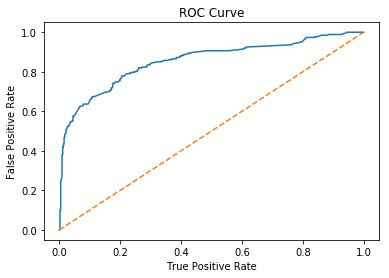

In [85]:
fpr, tpr, thresh = roc_curve(y_train_pred_final['Survived'], y_train_pred_final['Prob'])
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

- *ROC Curve displays that the model is performing reasonable well.*

In [82]:
num = [i/10 for i in range(10)]
for i in num:
    y_train_pred_final[i] = y_train_pred_final['Prob'].apply(lambda x : 1 if x>i else 0)

In [83]:
y_train_pred_final.head()

,PassengerId,Prob,Survived,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
408,409,0.119028,0,1,1,0,0,0,0,0,0,0,0
480,481,0.041954,0,1,0,0,0,0,0,0,0,0,0
510,511,0.089134,1,1,0,0,0,0,0,0,0,0,0
609,610,0.916699,1,1,1,1,1,1,1,1,1,1,1
547,548,0.251893,1,1,1,1,0,0,0,0,0,0,0


In [89]:
from sklearn.metrics import confusion_matrix
diff_cutoffs = pd.DataFrame(columns=['Cut-off', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in num:
    cm = confusion_matrix(y_train_pred_final['Survived'], y_train_pred_final[i])
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/total
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    diff_cutoffs.loc[i] = [i, acc, sensi, speci]

In [96]:
diff_cutoffs.reset_index(drop=True, inplace=True)

In [97]:
diff_cutoffs

,Cut-off,Accuracy,Sensitivity,Specificity
0,0.0,0.375000,1.000000,0.000000
1,0.1,0.595506,0.913858,0.404494
2,0.2,0.716292,0.861423,0.629213
3,0.3,0.768258,0.816479,0.739326
4,0.4,0.787921,0.775281,0.795506
5,0.5,0.786517,0.707865,0.833708
6,0.6,0.816011,0.625468,0.930337
7,0.7,0.797753,0.498127,0.977528
8,0.8,0.768258,0.400749,0.988764
9,0.9,0.698034,0.202247,0.995506


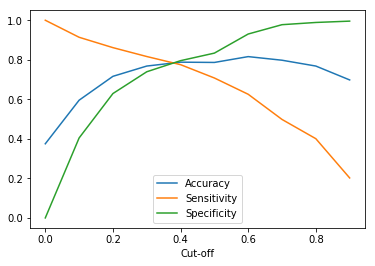

In [103]:
diff_cutoffs.plot.line(x='Cut-off', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

- *Let's use the Cut-off as 0.4.*

In [106]:
pred_df_train = y_train_pred_final[['PassengerId', 'Survived', 0.4]]
pred_df_train.columns = ['PassengerId', 'Survived', 'Predicted']

*Let's now make the predictions on the test set.*

In [55]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [56]:
df_test.head()

,Q,S,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
205,0,1,206,0,0.845053,0,-2.121447,-0.485282,0.790680,-0.434577
44,1,0,45,1,0.845053,0,-0.820587,-0.485282,-0.474408,-0.483796
821,0,1,822,1,0.845053,1,-0.208418,-0.485282,-0.474408,-0.468872
458,0,1,459,1,-0.339352,0,1.551569,-0.485282,-0.474408,-0.433863
795,0,1,796,0,-0.339352,1,0.709836,-0.485282,-0.474408,-0.386231


In [58]:
X_test = df_test[X_train.columns]
y_test = df_test['Survived']

In [59]:
X_test_sm = sm.add_constant(X_test)

In [60]:
y_test_pred = model_5.predict(X_test_sm)

In [71]:
y_test_pred_final = pd.DataFrame(df_test['PassengerId'])
y_test_pred_final['Prob'] = y_test_pred

In [109]:
y_test_pred_final['Survived'] = df_test['Survived']

In [112]:
y_test_pred_final['Predicted'] = y_test_pred_final['Prob'].apply(lambda x : 1 if x>0.4 else 0)

In [114]:
confusion_matrix(y_test_pred_final['Survived'], y_test_pred_final['Predicted'])

array([[87, 17],
       [16, 59]], dtype=int64)

In [115]:
# Accuracy
(87+59)/(87+17+16+59)

0.8156424581005587

In [116]:
# Sensitivity
59/(59+16)

0.7866666666666666

In [117]:
# Specificity
87/(87+17)

0.8365384615384616

- *Reasonable good values of metrics are achieved.*

#### *Let's apply our model on the separate test file.*

In [129]:
test = pd.read_csv('test.csv')

In [130]:
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [131]:
t_test = test[X_train.columns]

In [133]:
t_test.head()

,Pclass,Sex,Age,SibSp
0,0.845053,male,0.365491,-0.485282
1,0.845053,female,1.322005,0.423983
2,-0.339352,male,2.469822,-0.485282
3,0.845053,male,-0.208418,-0.485282
4,0.845053,female,-0.591024,0.423983


In [134]:
t_test['Sex'] = t_test['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [135]:
t_test_sm = sm.add_constant(t_test)

In [139]:
final = pd.DataFrame(test['PassengerId'])
final['Prob'] = model_5.predict(t_test_sm)
final['Survived'] = final['Prob'].apply(lambda x : 1 if x>0.4 else 0)

In [142]:
final.drop('Prob', axis=1, inplace=True)
final.set_index('PassengerId', inplace=True)

In [144]:
final.to_csv('titanicpred.csv')

- *On Kaggle, I got a score of over 0.76*

In [145]:
final

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1
